In [1]:
# filter
import numpy as np
from wbtool import show
from wbtool.show import wshow
import matplotlib.pyplot as plt
import importlib
import proc_data,aux


tms = np.load('tms.npy')
sms = np.load('sms.npy')
nobs = np.load('nobs.npy')


/home/wb/apps/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from skimage import morphology
from onevision import morphology as ovmorph
importlib.reload(aux)


segtracker_args = {
    'sam_gap': 1, # the interval to run sam to segment new objects
    'min_area': 20, # minimal mask area to add a new mask as a new object
    'max_obj_num': 255, # maximal object number to track in a video
    'min_new_obj_iou': 0.8, # the area of a new object in the background should > 80% 
    'new_replace_iou_min': 0.5,
    'remain_remove_max':0.4,
    'min_keep_area_ratio':0.0001
}

importlib.reload(ovmorph)

fid = 1
track_mask=tms[fid]
seg_mask=sms[fid]

track_mask = ovmorph.isolate_object(track_mask)
seg_mask = ovmorph.isolate_object(seg_mask)

# new_obj_mask = aux.find_new_objs(segtracker_args, track_mask, seg_mask, tms.max())
pred_mask = aux.merge_pt(segtracker_args, track_mask, seg_mask)

In [15]:
# importlib.reload(show)
import proc_data
from onevision import improc,morph_proc
# print(track_mask.max(), seg_mask.max(), pred_mask.max())
# kk=1
# show.wshow(track_mask*kk)
# show.wshow(seg_mask*kk)
# show.wshow(pred_mask*kk)
# print(proc_data._palette)
# show.wshow(proc_data.colorize_mask(track_mask))
# show.wshow(proc_data.colorize_mask(seg_mask))
# show.wshow(proc_data.colorize_mask(pred_mask))
# for k in range(1, pred_mask.max()):
#     _, num = ovmorph.region_detect(pred_mask==k, True)
#     if num>1:
#         print(k)
#         wshow(pred_mask==k)
A=[]
for fid in range(5):
    track_mask=tms[fid]
    seg_mask=sms[fid]
    temp = improc.channel_1to3(np.zeros(track_mask.shape))
    A.append(show.overlay_mask(temp, morph_proc.map_to_masks(track_mask)))
# wshow(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


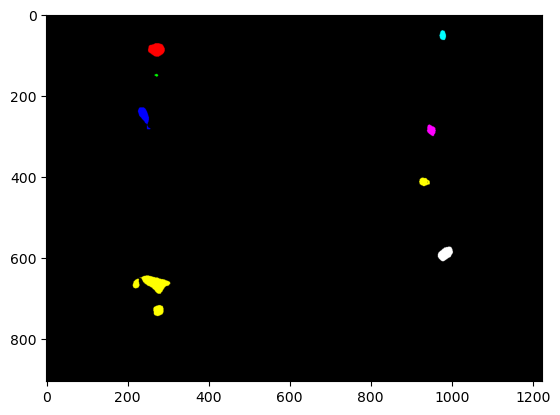

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


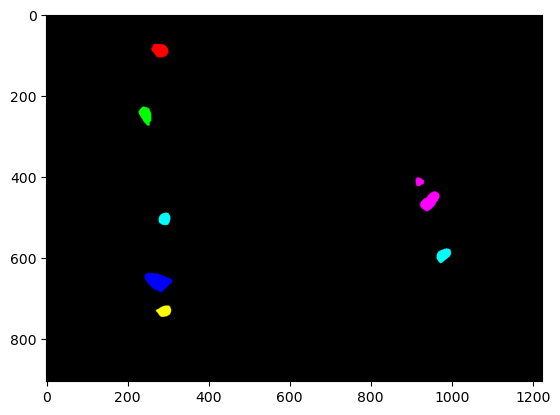

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


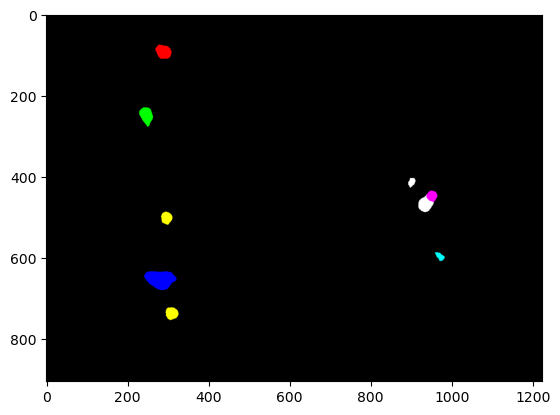

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


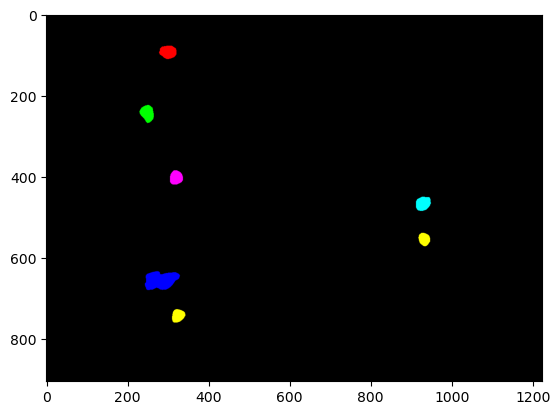

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


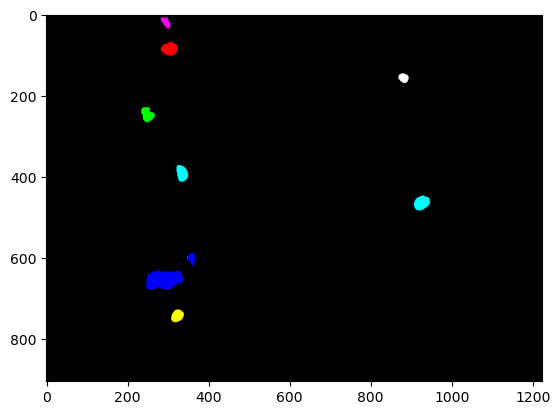

In [17]:
for it in A:
    wshow(it)